In [163]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [164]:
from platform import python_version

In [165]:
python_version()

'3.7.9'

In [166]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [167]:
entry_phase_color_map_val = [1, 2, 3, 4, 5]
entry_phase_color_map = ListedColormap(['red', 'green', 'blue', 'orange', 'purple'])

In [168]:
data = pd.read_csv('sim_log_Edwards.csv')
#data = pd.read_csv('sim_log_Vandenberg.csv')
#data = pd.read_csv('sim_log_Istres.csv')

data['time'] = data['time'] - data['time'][0]

data.head()

,step,time,alt,speed,hdot,range,az_err,lat,long,pitch,roll,unl_roll,roll_ref,l_d,drag,drag_ref,hdot_ref,entry_phase,Unnamed: 18
0,1,0,121.239000,7846.999461,-164.867980,8048.196778,5.069447,-0.706723,174.289912,40.0,0.0,0.0,0.0,0.238678,0.027406,0.0,0.0,1,NaN
1,2,2,120.909319,7847.379743,-164.812901,8048.196786,5.060952,-0.617728,174.387639,40.0,0.0,0.0,0.0,0.239571,0.028284,0.0,0.0,1,NaN
2,3,4,120.579749,7847.759369,-164.756735,8033.559291,5.064521,-0.528723,174.485374,40.0,0.0,0.0,0.0,0.240517,0.029193,0.0,0.0,1,NaN
3,4,6,120.250293,7848.138316,-164.699474,8018.920390,5.068205,-0.439707,174.583116,40.0,0.0,0.0,0.0,0.241516,0.030134,0.0,0.0,1,NaN
4,5,8,119.920952,7848.516560,-164.641112,8004.280079,5.071857,-0.350681,174.680866,40.0,0.0,0.0,0.0,0.242573,0.031112,0.0,0.0,1,NaN


In [169]:
def angle360(angle):
    out = angle

    while (out >= 360):
        out -= 360
    while (out < 0):
        out += 360
    return out

def angle180(angle):
    out = angle

    while (out >= 180):
        out -= 360
    while (out < -180):
        out += 360
    return out

In [172]:
import plotly.graph_objects as go
from math import log2, radians, cos, sqrt


# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data['long'],
    lat=data['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data['alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data['alt'].min(),
        cmax=data['alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Az err: %{customdata}<extra></extra>',
    text=data['alt'],
    customdata=data['az_err']
)

long360 = data['long'].apply(lambda l: angle360(l)).to_numpy()

center_lat = (data['lat'].min() + data['lat'].max()) / 2
center_lon = angle180((long360.min() + long360.max()) / 2)

print(center_lat, center_lon)


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,
    
        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),
        
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

fig.show.update_layout(
    autosize=False,
    width=800,
    height=800,)



16.88392583749589 -152.44792844405998


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Speed (m/s)')

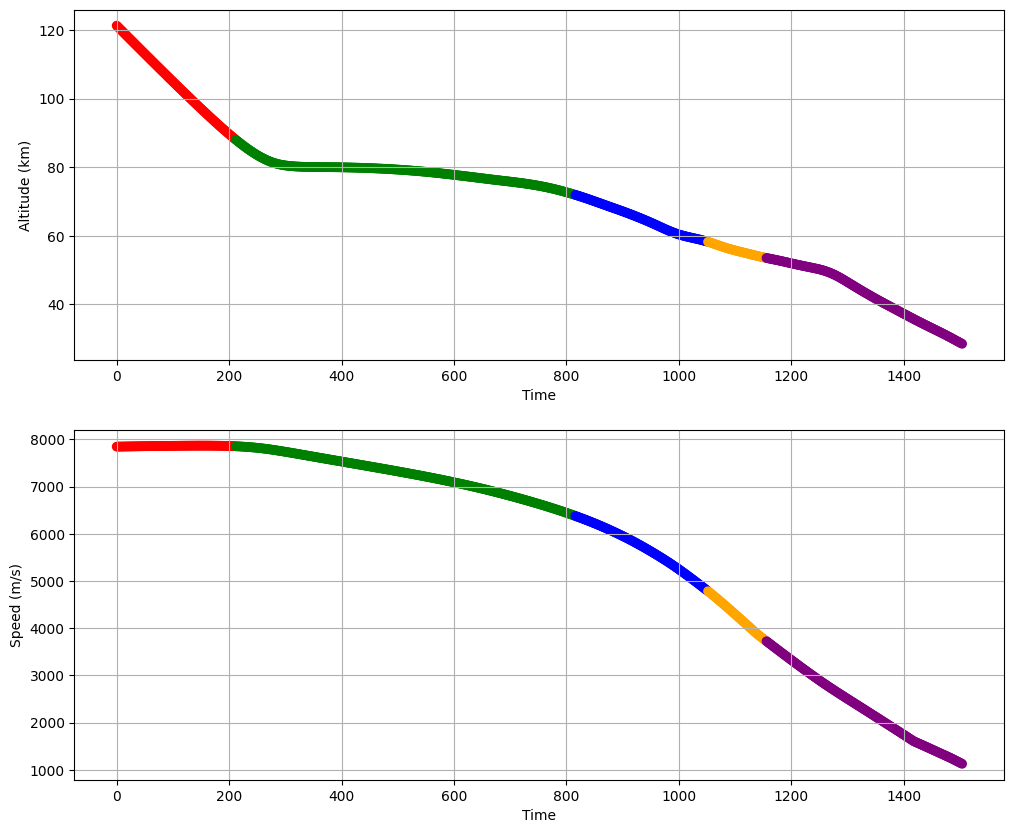

In [173]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt1 = plt_.scatter(data['time'], data['alt'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)
    

plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()
  


plt_ = ax[1]
plt2 = plt_.scatter(data['time'], data['speed'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()




Text(0.5, 0, 'Range')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Range')

Text(0, 0.5, 'Crossrange (km)')

Text(0.5, 0, 'Range')

Text(0, 0.5, 'Speed (m/s)')

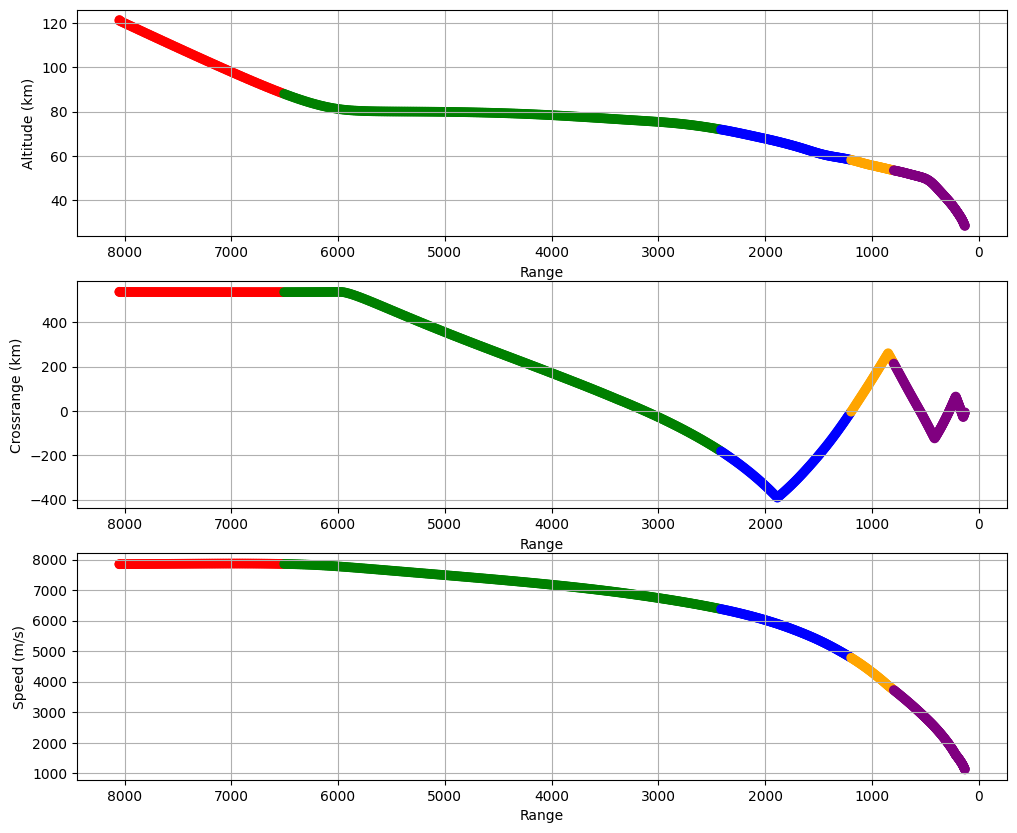

In [174]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

plt_ = ax[0]

plt1 = plt_.scatter(data['range'], data['alt'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)

    
plt_.set_xlabel('Range')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_.invert_xaxis()

sin_B = data['az_err'].apply(lambda az: math.sin(math.radians(az))).to_numpy()
sin_c = data['range'].apply(lambda r : math.sin(r / 6371) ).to_numpy()
xr = np.arcsin(np.multiply(sin_B, sin_c)) * 6371


plt_ = ax[1]
plt1 = plt_.scatter(data['range'], xr, c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)


    
plt_.set_xlabel('Range')
plt_.set_ylabel('Crossrange (km)')
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[2]
plt1 = plt_.scatter(data['range'], data['speed'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)


plt_.set_xlabel('Range')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()

plt_.invert_xaxis()




Text(0.5, 0, 'Speed')

Text(0, 0.5, 'Pitch °')

Text(0.5, 0, 'speed')

Text(0, 0.5, 'Roll °')

(-200.0, 150.0)

Text(0.5, 0, 'speed')

Text(0, 0.5, 'hdot')

(0.0, 52.0)

Text(0.5, 0, 'speed')

Text(0, 0.5, 'drag (ft/s)')

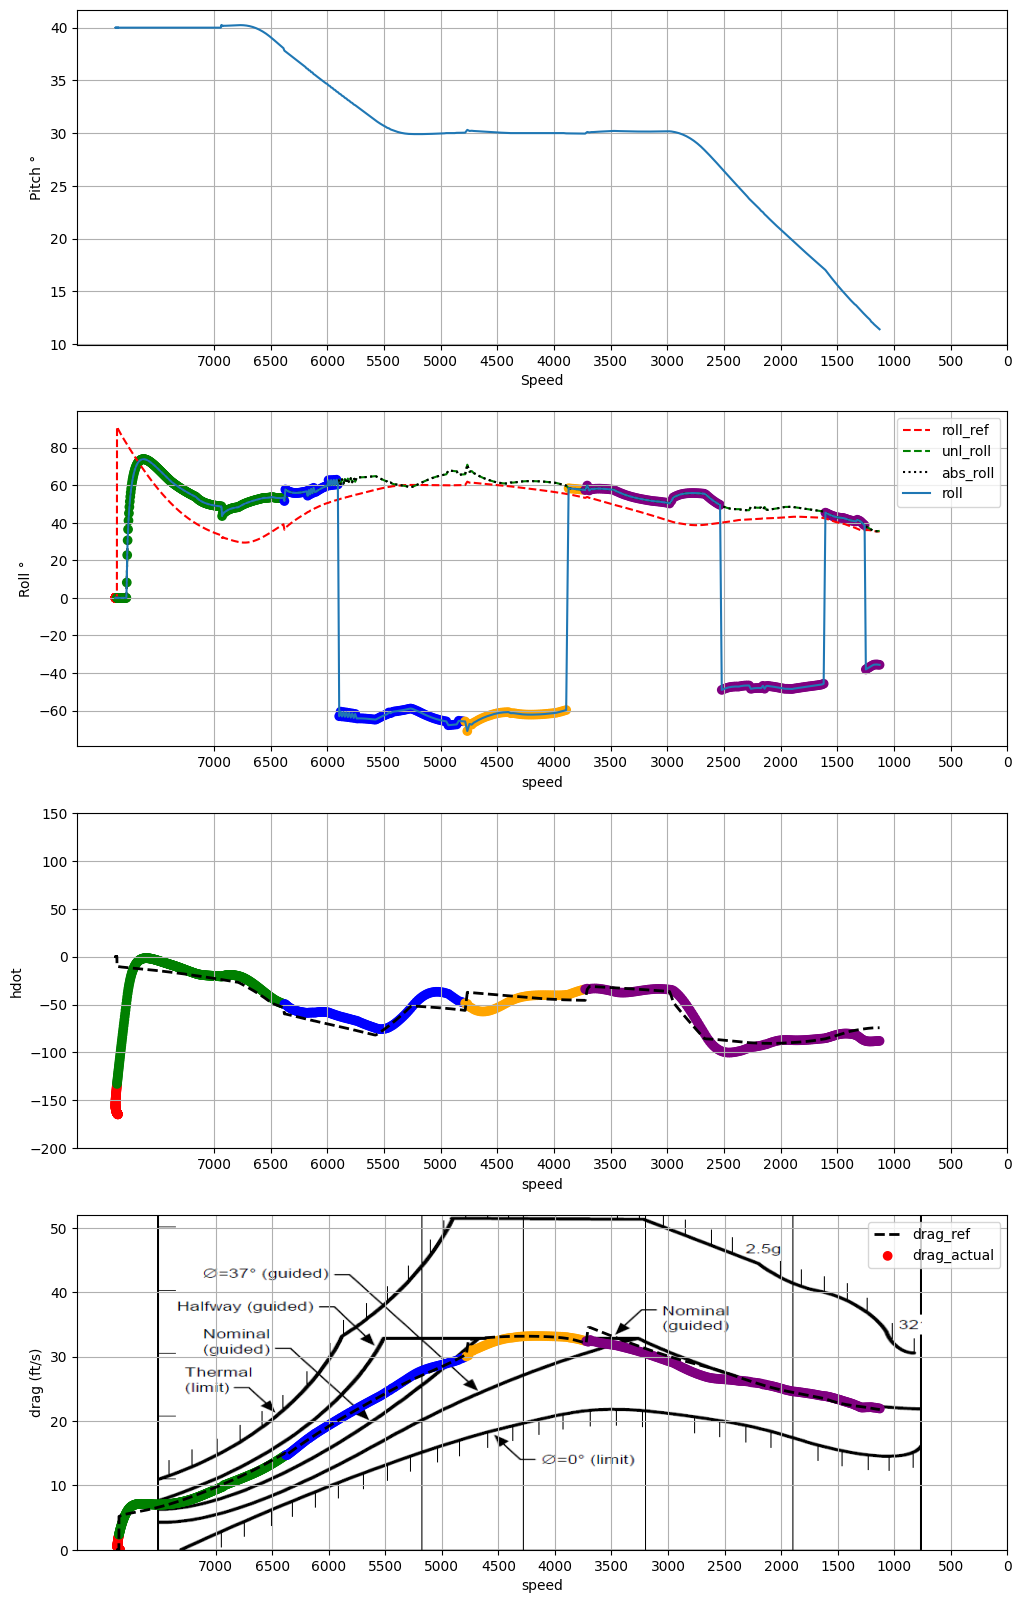

In [175]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

major_ticks = np.arange(0, 7500, 500)

plt_ = ax[0]
plt_.plot(data['speed'], data['pitch'])
    
plt_.set_xlabel('Speed');
plt_.set_ylabel('Pitch °')

plt_.set_xticks(major_ticks);
plt_.grid();


plt_.invert_xaxis()

plt_ = ax[1]

plt_.plot(data['speed'], abs(data['roll_ref']),'--', color='r',label='roll_ref');
plt_.plot(data['speed'], abs(data['unl_roll']),'--', color='g',label='unl_roll');
plt_.plot(data['speed'], abs(data['roll']),':', color='k',label='abs_roll');
plt1 = plt_.plot(data['speed'], data['roll'], label='roll');

plt1 = plt_.scatter(data['speed'], data['roll'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)


    
plt_.set_xlabel('speed')
plt_.set_ylabel('Roll °')
plt_.legend()

plt_.set_xticks(major_ticks);
plt_.grid();

plt_.invert_xaxis()


plt_ = ax[2]


plt_.plot(data['speed'], data['hdot_ref'], '--', linewidth=2, color='k',label='drag_ref')
plt1 = plt_.scatter(data['speed'], data['hdot'], label='drag_actual', c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)
 
plt_.set_ylim([-200, 150])

plt_.set_xlabel('speed')
plt_.set_ylabel('hdot')
plt_.set_xticks(major_ticks)
plt_.grid()

plt_.invert_xaxis()


plt_ = ax[3]

img = plt.imread("drag2.png")
plt_.imshow(img, aspect='auto', extent=[7520, 762, -0.2, 60.2], alpha=1 , cmap='Greys_r');

plt_.plot(data['speed'], data['drag_ref'],'--', linewidth=2, color='k',label='drag_ref');

plt1 = plt_.scatter(data['speed'], data['drag'], label='drag_actual', c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5);
  
plt.ylim([0, 52])

plt_.set_xlabel('speed')
plt_.set_ylabel('drag (ft/s)')
plt_.legend()
plt_.set_xticks(major_ticks)
plt_.grid()


[Text(1, 1.4, 'Preeentry'),
 Text(1, 2.2, 'T control'),
 Text(1, 3.0, 'Eq glide'),
 Text(1, 3.8, 'Const drag'),
 Text(1, 4.6, 'Transition')]

Text(0.5, 0, 'speed')

Text(0, 0.5, 'L/D')

(0.0, 2.8)

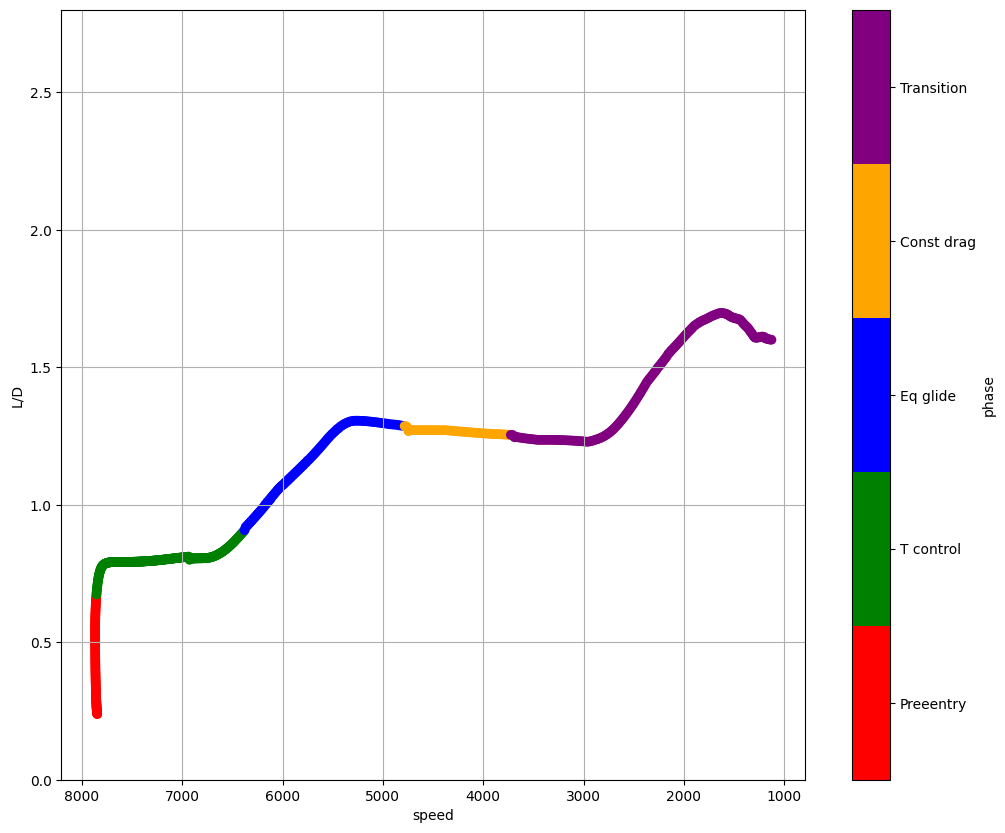

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

plt_ = ax
plt1 = plt_.scatter(data['speed'], data['l_d'], c=data['entry_phase'], cmap=entry_phase_color_map, vmin=1, vmax=5)

cbar = plt.colorbar(plt1,ticks=[1.4, 2.2, 3.0, 3.8, 4.6])
cbar.ax.set_yticklabels(['Preeentry', 'T control', 'Eq glide', 'Const drag', 'Transition'])
cbar.set_label('phase')  
    
plt_.set_xlabel('speed')
plt_.set_ylabel('L/D')
plt_.grid()

plt.ylim([0, 2.8])

plt_.invert_xaxis()


In [177]:
def traj_disp_new(n, data):
    if n==1:
        
        r_range = (0, 9000)
        r_speed = (5500, 7800)
    elif n==2:
        r_speed = (4330, 5500)

    elif n==3:
        r_speed = (3400, 4330)

    elif n==4:
        r_speed = (1950, 3400)

    elif n==5:
        r_speed = (300, 1950)
        
    traj_data = data[(data['speed'].between(*r_speed))][['range', 'speed', 'drag', 'hdot']]

    traj_vel = traj_data['speed'].to_numpy()
    traj_drag = traj_data['drag'].to_numpy()
    traj_color = traj_data['drag'].to_numpy()

    traj_x = np.array([traj_x_convert_new(n, v, d) for v, d in zip(traj_vel, traj_drag)])
    traj_y = np.array([traj_y_convert_new(n, v) for v in traj_vel])

    trajplot_lines_new(n, [traj_x, traj_y, traj_color])

def trajplot_lines_new(n, data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    img = plt.imread("traj" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])

    
    custom_cmap = plt.cm.get_cmap('viridis', 20)
        
    plt1 = plt_.scatter(
                       data[0],
                       data[1],
        c=data[2], cmap=custom_cmap, s=10)


    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])
    
    cbar = plt.colorbar(plt1)
    
        
def traj_x_convert_new(n, vel, drag):
    
    if n==1:
        return 555.3926783243992 + 0.137078652046288 * vel**1 * drag**0 + -94.72561947028342 * vel**0 * drag**1 + -3.344538192253144e-05 * vel**2 * drag**0 + 0.00906907118021625 * vel**1 * drag**1 + 1.8200934250524303 * vel**0 * drag**2 + 2.3076131838717373e-09 * vel**3 * drag**0 + -3.512244427130015e-07 * vel**2 * drag**1 + -5.082702175883116e-05 * vel**1 * drag**2 + -0.014714191410748175 * vel**0 * drag**3
        
    elif n==2:
        return -38.0268152009462 + 0.09906578419425373 * vel**1 * drag**0 + -12.707084859116666 * vel**0 * drag**1 + 1.3305326295037778e-06 * vel**2 * drag**0 + 0.0011766877774739082 * vel**1 * drag**1 + -0.014838331795402771 * vel**0 * drag**2
    elif n==3:
        return -531.1596833649385 + 0.2369508010818678 * vel**1 * drag**0 + -0.7771572651359938 * vel**0 * drag**1 + -2.1586890749936138e-07 * vel**2 * drag**0 + 0.00021100580946806138 * vel**1 * drag**1 + -0.1132059499998106 * vel**0 * drag**2
    elif n==4:
        return -748.4063596835092 + 0.7408869827508833 * vel**1 * drag**0 + -13.833348494044804 * vel**0 * drag**1 + -8.626522934807035e-05 * vel**2 * drag**0 + 2.9372518671475292e-05 * vel**1 * drag**1 + 0.10761028181794845 * vel**0 * drag**2
    elif n==5:
        return -776.3651212085673 + 1.0608120994108508 * vel**1 * drag**0 + -0.0012408627622487007 * vel**0 * drag**1 + -0.000190689080882267 * vel**2 * drag**0 + -0.0018267317853930109 * vel**1 * drag**1 + -0.062043138111733405 * vel**0 * drag**2
        
            
def traj_y_convert_new(n, vel):

    if n==1:
        out = (-0.1187007912 * vel + 966.857 + 32.7)
    elif n==2:
        out = (-0.23731299972 * vel + 1342.6666 + 32.7)
    elif n==3:
        out = (-0.255413394 * vel + 1170 + 32.7)
    elif n==4:
        out = (-0.171587932 * vel + 639 + 32.7)
    elif n==5:
        out = (-0.2568241552 * vel + 565.714 + 32.7)

    return  50 - (out - 350)
    

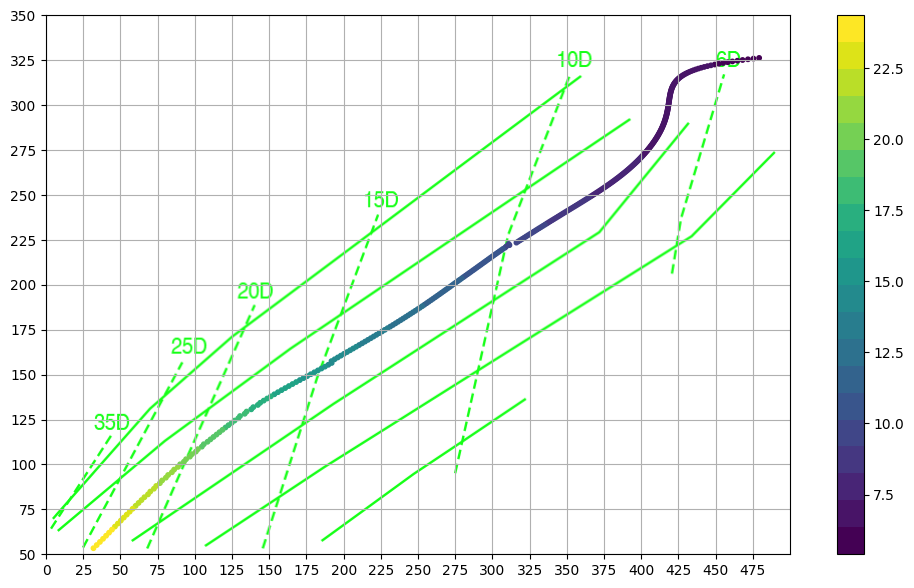

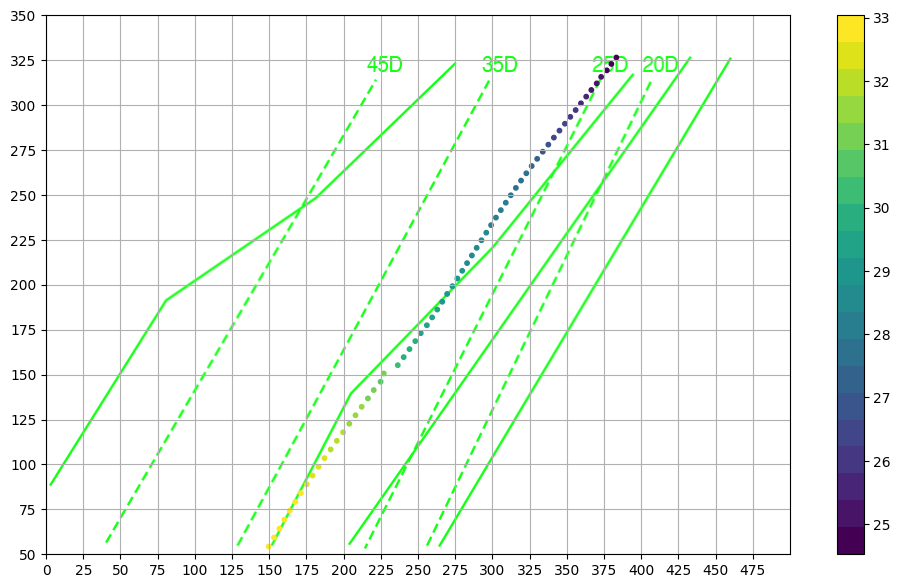

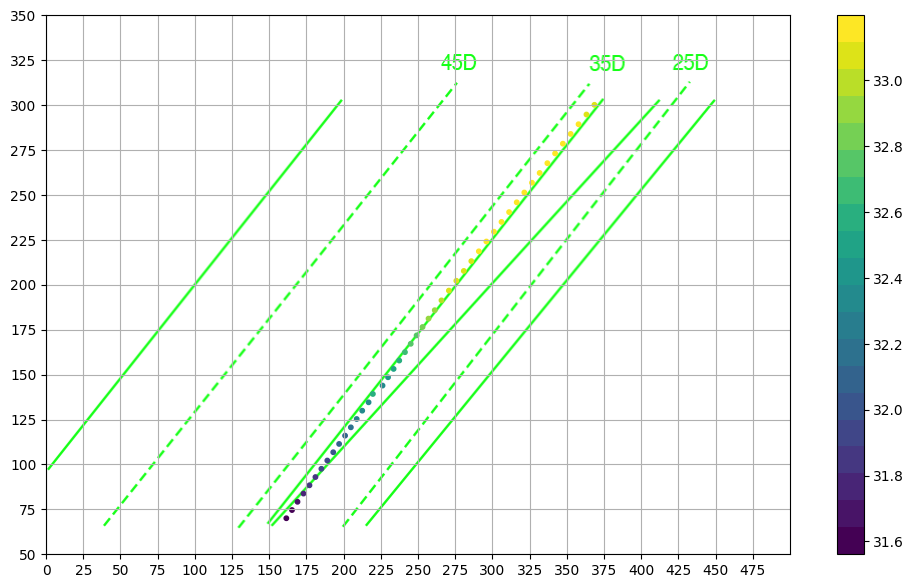

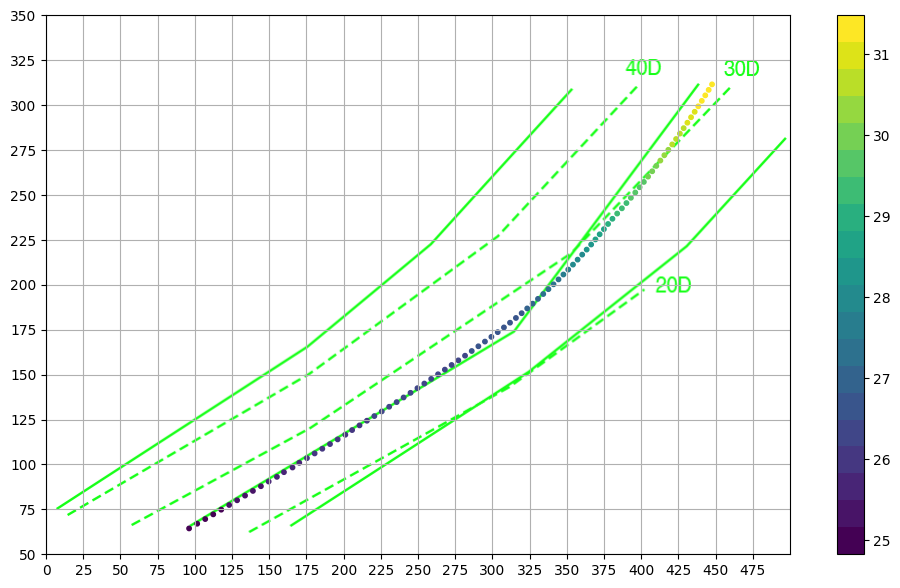

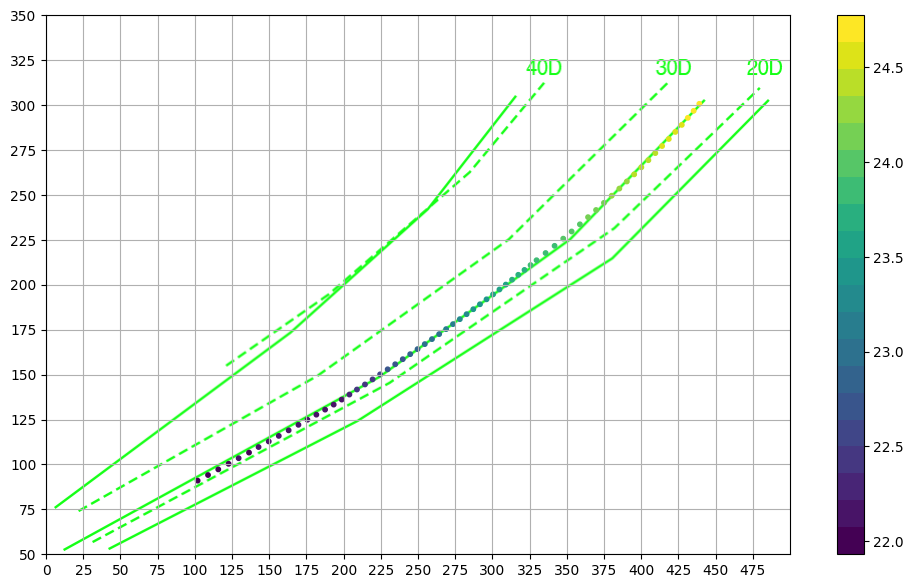

In [178]:
traj_disp_new(1, data)
traj_disp_new(2, data)
traj_disp_new(3, data)
traj_disp_new(4, data)
traj_disp_new(5, data)